# Project: The Brain Tumor Model Project

## Table of Contents

- <a href='#dataset'>1. Data Set Description</a>
- <a href="#wrangling">2. Data Wrangling</a>
    - <a href='#wranglingChest'>2.1. Dataset Of Brain</a>
- <a href='#info'>4.1. Show Information Of DataSet</a>
- <a href="#eda">3. Exploratory Data Analysis</a>
- <a href='#pre'>4. Preprocessing DataSet</a>
    - <a href='#save'>4.2. Save DataSet After Preprocessing</a>
- <a href='#cnn'>5. CNN Model</a>
    - <a href='#aug'>5.1. Data Augmentation</a>
        - <a href='#apply'>5.1.1. Apply</a>
        - <a href='#demo'>5.1.2. Demo</a>
    - <a href='#build'>5.2. Model Building</a>
        - <a href='#scrath'>5.2.1. Model from Scratch </a>
             - <a href='#scrathf'>5.2.1.1. Model from Simple Scratch</a>
             - <a href='#scratchComplex'>5.2.1.2. Model from Scratch More Complex</a>
        - <a href='#VGG16'>5.2.2. Model VGG16</a>
            - <a href='#trainVGG16'>5.2.2.1. Model VGG16 ( trainable  )</a>
            - <a href='#freezeVGG16'>5.2.2.2. Model VGG16 ( false trainalbe ) </a>
        - <a href='#ResNet152V2'>5.2.3. Model ResNet152V2</a>
            - <a href='#trainResNet152V2'>5.2.3.1. Model ResNet152V2 ( trainable  )</a>
            - <a href='#freezeResNet152V2'>5.2.3.2. Model ResNet152V2 ( false trainalbe )</a>
        - <a href='#Xception'>5.2.4. Model Xception</a>
            - <a href='#aXception'>5.2.4.1. Model Xception  ( trainable  )</a>
            - <a href='#bXception'>5.2.4.2. Model Xception ( false trainalbe )</a>
        - <a href='#MobileNet'>5.2.5. Model MobileNet</a>
            - <a href='#trainMobileNet'>5.2.5.1. Model MobileNet  ( trainable  )</a>
            - <a href='#freezeMobileNet'>5.2.5.2. Model MobileNet ( false trainalbe )</a>
        - <a href='#InceptionV3'>5.2.6. Model InceptionV3</a>
            - <a href='#trainInceptionV3'>5.2.6.1. Model InceptionV3</a>
            - <a href='#freezeInceptionV3'>5.2.6.2. Model InceptionV3 ( false trainalbe )</a>
    - <a href='#perf'>5.3. Model Performance</a>
    - <a href='#tensor'>5.4. Convert Model Keras To TensorFlow</a>
- <a href='#concl'>. Conclusions</a>

<a id='dataset'></a>
## Data Set Description

The image data that was used for this problem is [ Brain Tumor ] (https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri). 

# Importing libraries

In [2]:
from keras.layers import Conv2D, MaxPooling2D , Activation, Dropout, BatchNormalization, Flatten, Dense,AveragePooling2D
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.callbacks import ModelCheckpoint ,ReduceLROnPlateau ,EarlyStopping
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn 
import random
import cv2
import os

<a id='wrangling'></a>
## Data Wrangling

### General Properties

<a id='wranglingChest'></a>
## Dataset Of Brain

In [3]:
path_brain_tumor_test='../input/brain-tumor-classification-mri'
path_brain_tumor_train='../input/brain-tumor-classification-mri/Training'

In [4]:
list_path_test=[]
for path in os.listdir(path_brain_tumor_test):
    list_path_test.append(path_brain_tumor_test+'/'+path)
    
list_path_train=[]
for path in os.listdir(path_brain_tumor_train):
    list_path_train.append(path_brain_tumor_train+'/'+path)

In [5]:
test_images_path =[]
for i in range(len(list_path_test)):
    for name in os.listdir(list_path_test[i]):
        test_images_path.append(list_path_test[i]+'/'+ name)
        
train_images_path =[]
for i in range(len(list_path_train)):
    for name in os.listdir(list_path_train[i]):
        train_images_path.append(list_path_train[i]+'/'+ name)

image_path = train_images_path + test_images_path
image_path[0]
image_path[1000].split('/')[-2]

'pituitary_tumor'

In [6]:
categories = []
list_class_categories = []
list_type_categories = []
files = []
name_img = []  
class_categories = [] # tumor 0

for filename in image_path:
    categories.append(filename.split('/')[-2])
    name_img.append(filename.split('/')[-1])
    files.append(filename)
    if 'no_tumor' == filename.split('/')[-2]:
        list_class_categories.append(str(0))
        list_type_categories.append('No Tumor')
        class_categories.append('Negative')
    elif 'pituitary_tumor' == filename.split('/')[-2]:
        list_class_categories.append(str(1))
        list_type_categories.append('Pituitary Tumor')
        class_categories.append('Positive')
    elif 'meningioma_tumor' == filename.split('/')[-2]:
        list_class_categories.append(str(2))
        list_type_categories.append('Meningioma Tumor')
        class_categories.append('Positive')
    else:
        list_class_categories.append(str(3))
        list_type_categories.append('Glioma Tumor')
        class_categories.append('Positive')

df_Tumor = pd.DataFrame({'filename': files,'name_image' : name_img , 'class' : list_class_categories , 'Type Disease' : list_type_categories ,'class_categories': class_categories})
len(df_Tumor)

2878

In [7]:
df_Tumor[:5]

,filename,name_image,class,Type Disease,class_categories
0,../input/brain-tumor-classification-mri/Traini...,image(84).jpg,0,No Tumor,Negative
1,../input/brain-tumor-classification-mri/Traini...,image(44).jpg,0,No Tumor,Negative
2,../input/brain-tumor-classification-mri/Traini...,image(245).jpg,0,No Tumor,Negative
3,../input/brain-tumor-classification-mri/Traini...,6.jpg,0,No Tumor,Negative
4,../input/brain-tumor-classification-mri/Traini...,image(238).jpg,0,No Tumor,Negative


## Save DataSet

In [8]:
df_Tumor.to_csv('DataSet_Tumor.csv')

<a id='info'></a>
## Show Information Of DataSet

#### Gathering Data

In [9]:
df = pd.read_csv('DataSet_Tumor.csv')
df[:10]

,Unnamed: 0,filename,name_image,class,Type Disease,class_categories
0,0,../input/brain-tumor-classification-mri/Traini...,image(84).jpg,0,No Tumor,Negative
1,1,../input/brain-tumor-classification-mri/Traini...,image(44).jpg,0,No Tumor,Negative
2,2,../input/brain-tumor-classification-mri/Traini...,image(245).jpg,0,No Tumor,Negative
3,3,../input/brain-tumor-classification-mri/Traini...,6.jpg,0,No Tumor,Negative
4,4,../input/brain-tumor-classification-mri/Traini...,image(238).jpg,0,No Tumor,Negative
5,5,../input/brain-tumor-classification-mri/Traini...,image(196).jpg,0,No Tumor,Negative
6,6,../input/brain-tumor-classification-mri/Traini...,image(108).jpg,0,No Tumor,Negative
7,7,../input/brain-tumor-classification-mri/Traini...,image(310).jpg,0,No Tumor,Negative
8,8,../input/brain-tumor-classification-mri/Traini...,image (5).jpg,0,No Tumor,Negative
9,9,../input/brain-tumor-classification-mri/Traini...,image(186).jpg,0,No Tumor,Negative


#### View information of data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2878 non-null   int64 
 1   filename          2878 non-null   object
 2   name_image        2878 non-null   object
 3   class             2878 non-null   int64 
 4   Type Disease      2878 non-null   object
 5   class_categories  2878 non-null   object
dtypes: int64(2), object(4)
memory usage: 135.0+ KB


#### View missing data

In [11]:
df.isnull().sum()

Unnamed: 0          0
filename            0
name_image          0
class               0
Type Disease        0
class_categories    0
dtype: int64

#### View duplicated data

In [12]:
sum(df.duplicated())

0

#### View unique data

In [13]:
df['class'].unique()

array([0, 1, 2, 3])

In [14]:
df['Type Disease'].unique()

array(['No Tumor', 'Pituitary Tumor', 'Meningioma Tumor', 'Glioma Tumor'],
      dtype=object)

In [15]:
df['class_categories'].unique()

array(['Negative', 'Positive'], dtype=object)

<a id='eda'></a>
## Exploratory Data Analysis

###  Question 1 : Which Category has a number of recurrences more?

we will create a list of the type to find the recurrences for each category

In [16]:
list_type = df['Type Disease'].unique()  #list of category
dict_type = {}
for category in list_type:
    count = len(df[df['Type Disease'] == category])
    dict_type[category]= count

In [17]:
dict_type

{'No Tumor': 395,
 'Pituitary Tumor': 827,
 'Meningioma Tumor': 822,
 'Glioma Tumor': 834}

In [18]:
# to extract category by using high recurrences
high_category = max(dict_type.values())
type_cat = ''
for types , count in dict_type.items():
    if high_category == count:
        type_cat = types
        break
        
type_cat , high_category

('Glioma Tumor', 834)

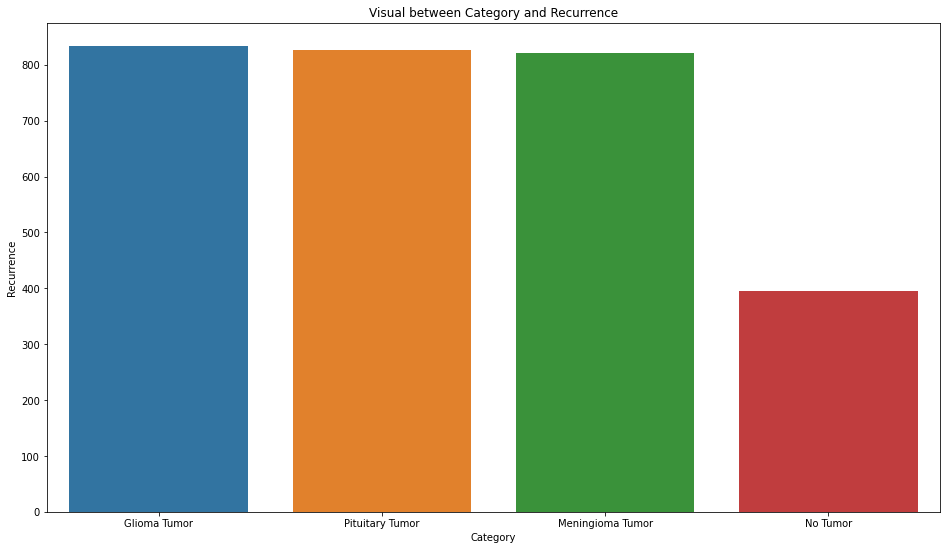

In [18]:
fig, ax =  plt.subplots(figsize =(16, 9)) 
ax.set_title('Visual between Category and Recurrence')
plt.xlabel('Category')
plt.ylabel('Recurrence')
dict_type = dict(sorted(dict_type.items(), key=lambda item: item[1],reverse=True))
dict_seaborn ={}
for category , count in dict_type.items():
    dict_seaborn[category] =count
seaborn.barplot(x=list(dict_seaborn.keys()),y=list(dict_seaborn.values()))
plt.show()

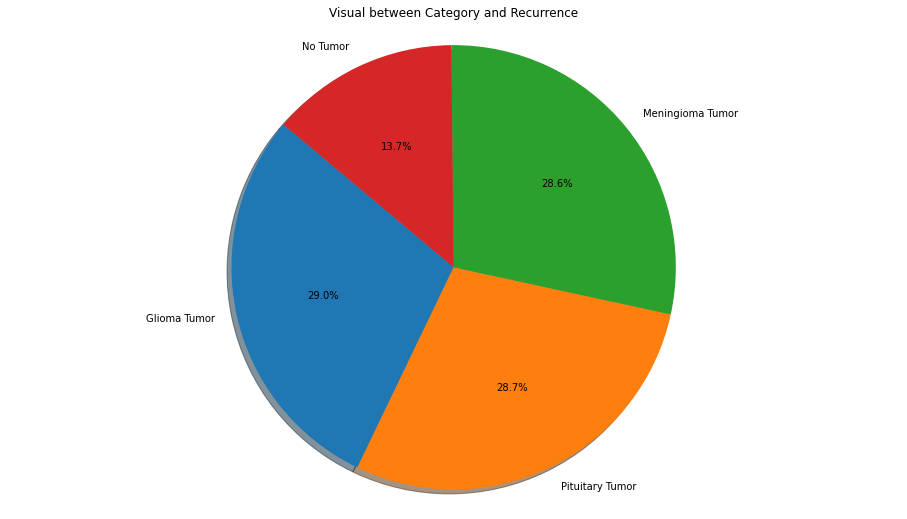

In [19]:
plt.subplots(figsize =(16, 9)) 
plt.title('Visual between Category and Recurrence')
labels = dict_seaborn.keys()
sizes = dict_seaborn.values()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [20]:
print("Answer :It becomes clear to us that the category owner of the highest recurrence is "+list(dict_type.keys())[0]+" which amounts to his recurrence {} .".format(list(dict_type.values())[0]))

Answer :It becomes clear to us that the category owner of the highest recurrence is Glioma Tumor which amounts to his recurrence 834 .


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  app.launch_new_instance()


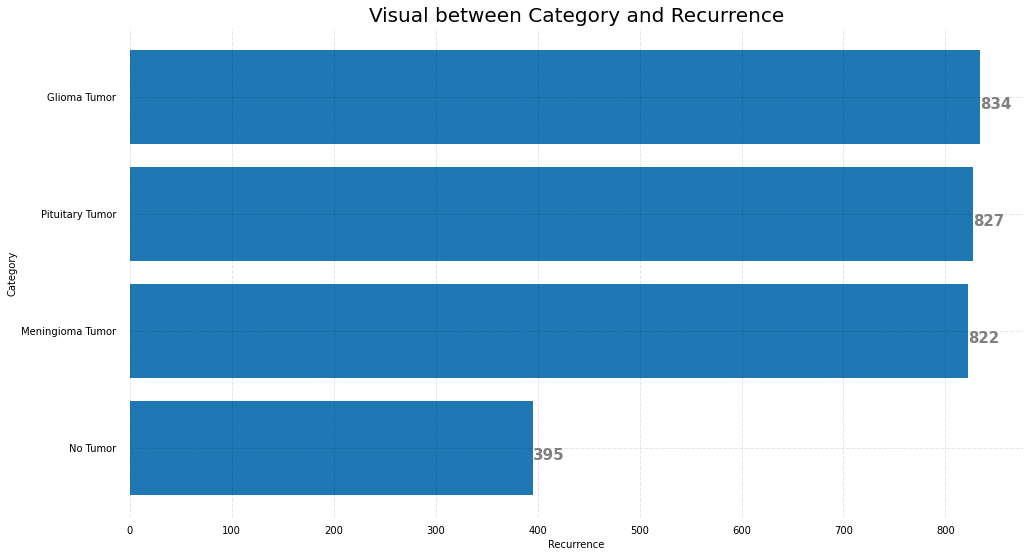

In [21]:
category = list(dict_seaborn.keys())
count = list(dict_seaborn.values())
  
fig, ax = plt.subplots(figsize =(16, 9)) 
ax.barh(category, count) 
  
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
ax.grid(b = True, color ='black', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 

ax.invert_yaxis() 
  
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 15, fontweight ='bold', 
             color ='grey') 
plt.xlabel('Recurrence')
plt.ylabel('Category')
ax.set_title('Visual between Category and Recurrence', fontsize=20)
# Show Plot 
plt.show(); 

<a id='pre'></a>
## Preprocessing DataSet

In [19]:
df_No_Tumor= df[df['Type Disease'] == 'No Tumor']
df_Pituitary= df[df['Type Disease'] == 'Pituitary Tumor']
df_Meningioma = df[df['Type Disease'] == 'Meningioma Tumor']
df_Glioma = df[df['Type Disease'] == 'Glioma Tumor']

## We will split each of dataframe to three dataframe ( Train , Validate , Test)
#### Train 70%
#### Valid 20%
#### Test 10%

### We will split data of Chest

In [20]:
# data of Chest
df_No_Tumor_old = df_No_Tumor
validate_df_No_Tumor = df_No_Tumor.sample(frac = 0.2)
train_df_No_Tumor= df_No_Tumor.drop(validate_df_No_Tumor.index)
validate_df_No_Tumor= validate_df_No_Tumor.reset_index()
train_df_No_Tumor = train_df_No_Tumor.reset_index()

test_df_No_Tumor = train_df_No_Tumor.sample(frac = 0.1)
train_df_No_Tumor= train_df_No_Tumor.drop(test_df_No_Tumor.index)
test_df_No_Tumor= test_df_No_Tumor.reset_index()
train_df_No_Tumor= train_df_No_Tumor.reset_index()

In [21]:
len(df_No_Tumor_old) , len(train_df_No_Tumor) , len(validate_df_No_Tumor) ,len(test_df_No_Tumor)

(395, 284, 79, 32)

### We will split data of Brain Tumor

In [22]:
# data of Brain Tumor
df_Pituitary_old = df_Pituitary
validate_df_Pituitary = df_Pituitary.sample(frac = 0.2)
train_df_Pituitary = df_Pituitary.drop(validate_df_Pituitary.index)
validate_df_Pituitary= validate_df_Pituitary.reset_index()
train_df_Pituitary = train_df_Pituitary.reset_index()

test_df_Pituitary = train_df_Pituitary.sample(frac = 0.1)
train_df_Pituitary = train_df_Pituitary.drop(test_df_Pituitary.index)
test_df_Pituitary= test_df_Pituitary.reset_index()
train_df_Pituitary = train_df_Pituitary.reset_index()

In [23]:
len(df_Pituitary_old) , len(train_df_Pituitary) , len(validate_df_Pituitary) ,len(test_df_Pituitary)

(827, 596, 165, 66)

### We will split data of Heart Beats

In [24]:
# data of Heart Beats
df_Meningioma_old = df_Meningioma
validate_df_Meningioma  = df_Meningioma.sample(frac = 0.2)
train_df_Meningioma = df_Meningioma.drop(validate_df_Meningioma.index)
validate_df_Meningioma = validate_df_Meningioma.reset_index()
train_df_Meningioma = train_df_Meningioma.reset_index()

test_df_Meningioma = train_df_Meningioma.sample(frac = 0.1)
train_df_Meningioma = train_df_Meningioma.drop(test_df_Meningioma.index)
test_df_Meningioma = test_df_Meningioma.reset_index()
train_df_Meningioma = train_df_Meningioma.reset_index()

In [25]:
len(df_Meningioma_old) , len(train_df_Meningioma) , len(validate_df_Meningioma) ,len(test_df_Meningioma)

(822, 592, 164, 66)

### We will split data of Brain Tumor

In [26]:
# data of Heart Beats
df_Glioma_old = df_Glioma
validate_df_Glioma = df_Glioma.sample(frac = 0.2)
train_df_Glioma = df_Glioma.drop(validate_df_Glioma.index)
validate_df_Glioma = validate_df_Glioma.reset_index()
train_df_Glioma = train_df_Glioma.reset_index()

test_df_Glioma = train_df_Glioma.sample(frac = 0.1)
train_df_Glioma= train_df_Glioma.drop(test_df_Glioma.index)
test_df_Glioma= test_df_Glioma.reset_index()
train_df_Glioma = train_df_Glioma.reset_index()

In [27]:
len(df_Glioma_old) , len(train_df_Glioma) , len(validate_df_Glioma) ,len(test_df_Glioma)

(834, 600, 167, 67)

<a id='save'></a>
##  Save DataSet After Preprocessing

In [28]:
!mkdir TRAIN  TRAIN/No_Tumor TRAIN/Pituitary TRAIN/Meningioma TRAIN/Glioma 
!mkdir VAL  VAL/No_Tumor VAL/Pituitary VAL/Meningioma VAL/Glioma 
!mkdir TEST  TEST/No_Tumor TEST/Pituitary TEST/Meningioma TEST/Glioma 

In [29]:
IMG_SIZE = (400,400)
def process_save_img(size,full_path_img,name_image,new_folder):
    if '.jpg' in full_path_img:
        img = cv2.imread(full_path_img)
        img = cv2.resize(img,dsize=IMG_SIZE,interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(new_folder+'/'+name_image, img)

In [30]:
#DataSet No_Tumor
for filename in tqdm(train_df_No_Tumor['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/No_Tumor')
print('finish TRAIN/No_Tumor')
for filename in tqdm(validate_df_No_Tumor['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/No_Tumor')
print('finish VAL/No_Tumor')
for filename in tqdm(test_df_No_Tumor['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/No_Tumor')
print('finish TEST/No_Tumor')


#DataSet Pituitary
for filename in tqdm(train_df_Pituitary['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Pituitary')
print('finish TRAIN/Pituitary')
for filename in tqdm(validate_df_Pituitary['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Pituitary')
print('finish VAL/Pituitary')
for filename in tqdm(test_df_Pituitary['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TEST/Pituitary')
print('finish TEST/Pituitary')


#DataSet Meningioma
for filename in tqdm(train_df_Meningioma['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Meningioma')
print('finish TRAIN/Meningioma')
for filename in tqdm(validate_df_Meningioma['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'VAL/Meningioma')
print('finish VAL/Meningioma')
for filename in tqdm(test_df_Meningioma['filename']):
        name_image = filename.split('/')[-1]
        if name_image != 'meningioma_tumor':
            process_save_img(IMG_SIZE,filename,name_image,'TEST/Meningioma')
print('finish TEST/Meningioma')


#DataSet Glioma
for filename in tqdm(train_df_Glioma['filename']):
        name_image = filename.split('/')[-1]
        process_save_img(IMG_SIZE,filename,name_image,'TRAIN/Glioma')
print('finish TRAIN/Glioma')
for filename in tqdm(validate_df_Glioma['filename']):
        name_image = filename.split('/')[-1]
        if name_image != 'glioma_tumor':
            process_save_img(IMG_SIZE,filename,name_image,'VAL/Glioma')
print('finish VAL/Glioma')
for filename in tqdm(test_df_Glioma['filename']):
        name_image = filename.split('/')[-1]
        if name_image != 'glioma_tumor':
            process_save_img(IMG_SIZE,filename,name_image,'TEST/Glioma')
print('finish TEST/Glioma')

100%|██████████| 284/284 [00:03<00:00, 82.20it/s]


finish TRAIN/No_Tumor


100%|██████████| 79/79 [00:00<00:00, 88.90it/s]


finish VAL/No_Tumor


100%|██████████| 32/32 [00:00<00:00, 99.88it/s] 


finish TEST/No_Tumor


100%|██████████| 596/596 [00:07<00:00, 77.71it/s]


finish TRAIN/Pituitary


100%|██████████| 165/165 [00:02<00:00, 76.75it/s]


finish VAL/Pituitary


100%|██████████| 66/66 [00:00<00:00, 83.69it/s]


finish TEST/Pituitary


100%|██████████| 592/592 [00:06<00:00, 86.00it/s]


finish TRAIN/Meningioma


100%|██████████| 164/164 [00:01<00:00, 86.16it/s]


finish VAL/Meningioma


100%|██████████| 66/66 [00:00<00:00, 87.77it/s]


finish TEST/Meningioma


100%|██████████| 600/600 [00:07<00:00, 82.96it/s]


finish TRAIN/Glioma


100%|██████████| 167/167 [00:01<00:00, 87.38it/s]


finish VAL/Glioma


100%|██████████| 67/67 [00:00<00:00, 88.95it/s]

finish TEST/Glioma


In [31]:
print('Length Of Data { No_Tumor } Train : ',len(os.listdir('TRAIN/No_Tumor')))
print('Length Of Data { No_Tumor } VAL : ',len(os.listdir('VAL/No_Tumor')))
print('Length Of Data { No_Tumor } TEST : ',len(os.listdir('TEST/No_Tumor')))

print('Length Of Data { Pituitary } Train : ',len(os.listdir('TRAIN/Pituitary')))
print('Length Of Data { Pituitary } VAL : ',len(os.listdir('VAL/Pituitary')))
print('Length Of Data { Pituitary } TEST : ',len(os.listdir('TEST/Pituitary')))

print('Length Of Data { Meningioma } Train : ',len(os.listdir('TRAIN/Meningioma')))
print('Length Of Data { Meningioma } VAL : ',len(os.listdir('VAL/Meningioma')))
print('Length Of Data { Meningioma } TEST : ',len(os.listdir('TEST/Meningioma')))

print('Length Of Data { Glioma } Train : ',len(os.listdir('TRAIN/Glioma')))
print('Length Of Data { Glioma } VAL : ',len(os.listdir('VAL/Glioma')))
print('Length Of Data { Glioma } TEST : ',len(os.listdir('TEST/Glioma')))

Length Of Data { No_Tumor } Train :  284
Length Of Data { No_Tumor } VAL :  79
Length Of Data { No_Tumor } TEST :  32
Length Of Data { Pituitary } Train :  596
Length Of Data { Pituitary } VAL :  165
Length Of Data { Pituitary } TEST :  66
Length Of Data { Meningioma } Train :  592
Length Of Data { Meningioma } VAL :  164
Length Of Data { Meningioma } TEST :  66
Length Of Data { Glioma } Train :  593
Length Of Data { Glioma } VAL :  166
Length Of Data { Glioma } TEST :  67


In [55]:
def plot_sample_new(path,labels_dict,start,end):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    plt.figure(figsize=(20,15))
    plt.suptitle('{}'.format(labels_dict))
    for img_name in tqdm(sorted(os.listdir(path))):   #tqdm --> progress bar 
        full_path_img = path + '/' + img_name
        img = cv2.imread(full_path_img, 0)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(5,5,start)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        start += 1
        if start == end:
                break

<a id='cnn'></a>
## CNN Model

<a id='aug'></a>
## Data Augmentation

<a id='apply'></a>
## Apply

In [32]:
train_gen = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_gen = ImageDataGenerator(rescale = 1./255)

In [33]:
IMG_SIZE = (224,224)
batch_size = 64
train_path = './TRAIN'
test_path = './TEST'
valid_path = './VAL'

train_generator = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_generator = ImageDataGenerator(rescale = 1./255)

trainRgb = train_generator.flow_from_directory(
      train_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical',
      batch_size=batch_size
      )

testRgb = test_generator.flow_from_directory(
      test_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      shuffle=False, 
      class_mode='categorical',
      batch_size=1
      )

validRgb = test_generator.flow_from_directory(
      valid_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 2065 images belonging to 4 classes.
Found 231 images belonging to 4 classes.
Found 574 images belonging to 4 classes.


In [58]:
IMG_SIZE = (299,299)
batch_size = 64
train_path = './TRAIN'
test_path = './TEST'
valid_path = './VAL'

train_generator = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True,          
                               )

# Create Image Data Generator for Test/Validation Set
test_generator = ImageDataGenerator(rescale = 1./255)

trainRgb99 = train_generator.flow_from_directory(
      train_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical',
      batch_size=batch_size
      )

testRgb99 = test_generator.flow_from_directory(
      test_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      shuffle=False, 
      class_mode='categorical',
      batch_size=1
      )

validRgb99 = test_generator.flow_from_directory(
      valid_path,
      target_size=IMG_SIZE,
      color_mode='rgb',
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 4128 images belonging to 4 classes.
Found 395 images belonging to 4 classes.
Found 983 images belonging to 4 classes.


<a id='demo'></a>
## Demo

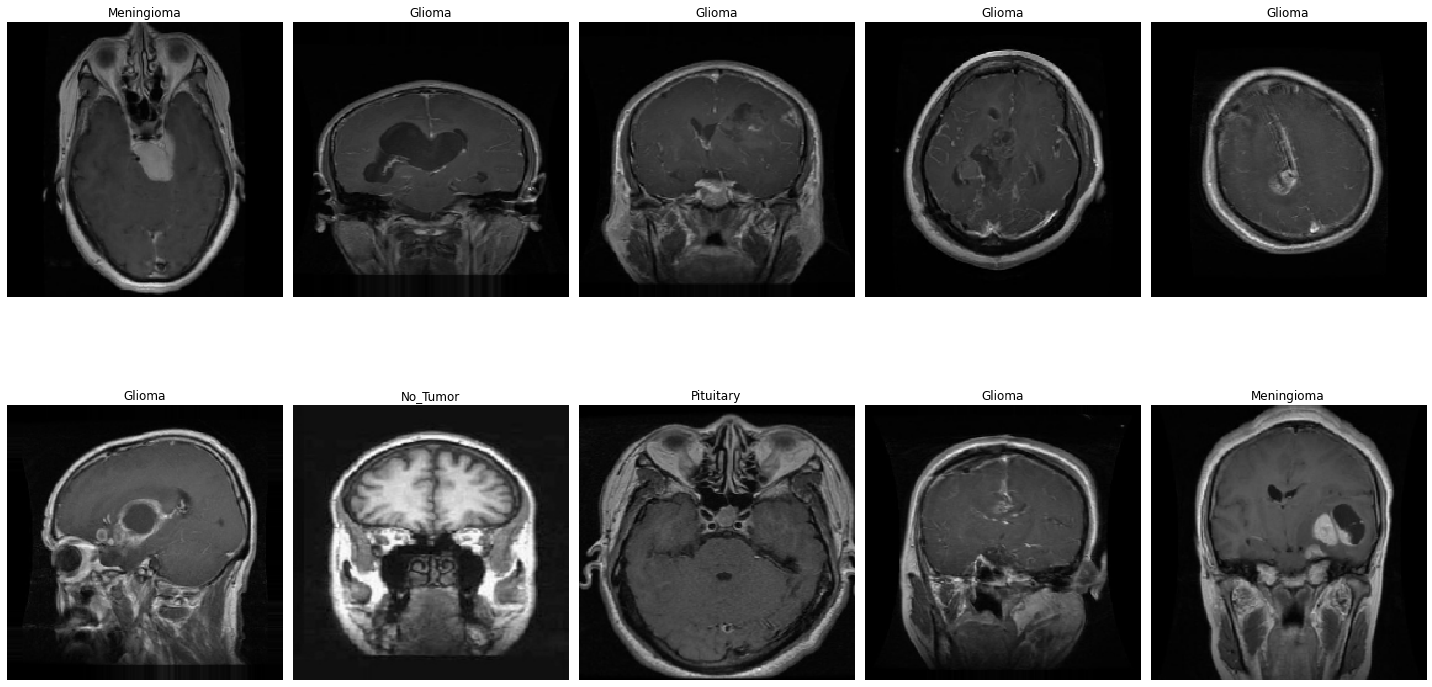

In [60]:
idx2label_dict = {trainRgb.class_indices[k]: k for k in trainRgb.class_indices}
idx2label_dict
plt.figure(figsize=(20, 12))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    for X_batch, Y_batch in trainRgb:
        image = X_batch[0]        
        plt.title(idx2label_dict.get(np.argmax(Y_batch[0])))    
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

In [36]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=4)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [37]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced',classes = np.unique(trainRgb.classes),y = trainRgb.classes)
cw = dict(zip( np.unique(trainRgb.classes), weights))
print(cw)

{0: 0.8705733558178752, 1: 0.872043918918919, 2: 1.817781690140845, 3: 0.8661912751677853}


<a id='build'></a>
## Model Building

<a id='scrath'></a>
## Model from Scratch

<a id='scrathf'></a>
## Model from Simple Scratch

In [64]:
input_shape = (224,224,3)
scratchSimple = Sequential()
scratchSimple.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchSimple.add(MaxPooling2D(pool_size = (2, 2)))
scratchSimple.add(Flatten())
scratchSimple.add(Dense(activation = 'relu', units = 128))
scratchSimple.add(Dense(activation = 'relu', units = 64))
scratchSimple.add(Dense(activation = 'softmax', units = 4))
scratchSimple.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
scratchSimple.summary()

2022-06-03 14:45:28.965148: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 14:45:29.174212: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 14:45:29.175478: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 14:45:29.177911: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        1

2022-06-03 14:45:29.178278: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 14:45:29.179333: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 14:45:29.180319: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 14:45:32.486984: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 14:45:32.488134: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [65]:
epochs = 15

historySimple = scratchSimple.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = scratchSimple.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-06-03 14:45:39.696147: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-06-03 14:45:42.536933: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


64/64 [==============================] - 66s 899ms/step - loss: 1.1501 - accuracy: 0.4577 - val_loss: 0.8581 - val_accuracy: 0.6625
Epoch 2/15
64/64 [==============================] - 60s 934ms/step - loss: 0.8463 - accuracy: 0.6262 - val_loss: 0.6325 - val_accuracy: 0.7281
Epoch 3/15
64/64 [==============================] - 59s 918ms/step - loss: 0.6725 - accuracy: 0.7126 - val_loss: 0.7083 - val_accuracy: 0.6667
Epoch 4/15
64/64 [==============================] - 60s 926ms/step - loss: 0.5372 - accuracy: 0.7721 - val_loss: 0.4929 - val_accuracy: 0.8156
Epoch 5/15
64/64 [==============================] - 60s 936ms/step - loss: 0.4546 - accuracy: 0.8069 - val_loss: 0.5270 - val_accuracy: 0.7656
Epoch 6/15
64/64 [==============================] - 60s 944ms/step - loss: 0.3599 - accuracy: 0.8516 - val_loss: 0.4594 - val_accuracy: 0.8333
Epoch 7/15
64/64 [==============================] - 59s 917ms/step - loss: 0.2974 - accuracy: 0.8765 - val_loss: 0.4036 - val_accuracy: 0.8469
Epoch 8/15

In [66]:
epochs = 5

historySimple = scratchSimple.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = scratchSimple.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/5
64/64 [==============================] - 61s 955ms/step - loss: 0.0527 - accuracy: 0.9828 - val_loss: 0.3128 - val_accuracy: 0.9302
Epoch 2/5
64/64 [==============================] - 60s 933ms/step - loss: 0.0523 - accuracy: 0.9811 - val_loss: 0.3105 - val_accuracy: 0.9323
Epoch 3/5
64/64 [==============================] - 60s 937ms/step - loss: 0.0519 - accuracy: 0.9783 - val_loss: 0.2765 - val_accuracy: 0.9448
Epoch 4/5
64/64 [==============================] - 60s 930ms/step - loss: 0.0426 - accuracy: 0.9818 - val_loss: 0.3226 - val_accuracy: 0.9333
Epoch 5/5
395/395 [==============================] - 3s 6ms/step - loss: 0.3496 - accuracy: 0.9241
The testing accuracy is : 92.40506291389465 %


In [114]:
scratchSimple.save('scratchSimpleT.h5')

<a id='scratchComplex'></a>
## Model from Scrath More Complex

In [68]:
input_shape = (224,224,3)
scratchComplex = Sequential()
scratchComplex.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(MaxPooling2D(pool_size = (2, 2)))
scratchComplex.add(BatchNormalization())
scratchComplex.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(MaxPooling2D(pool_size = (2, 2)))
scratchComplex.add(BatchNormalization())
scratchComplex.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(MaxPooling2D(pool_size = (2, 2)))
scratchComplex.add(BatchNormalization())
scratchComplex.add(Dropout(0.10))
scratchComplex.add(Conv2D(128, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(Conv2D(128, (3, 3), activation="relu", input_shape=input_shape))
scratchComplex.add(MaxPooling2D(pool_size = (2, 2)))
scratchComplex.add(BatchNormalization())
scratchComplex.add(Dropout(0.10))
scratchComplex.add(Flatten())
scratchComplex.add(Dense(activation = 'relu', units = 128))
scratchComplex.add(Dense(activation = 'relu', units = 64))
scratchComplex.add(Dense(activation = 'softmax', units = 4))
scratchComplex.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
scratchComplex.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 110, 110, 32)      128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 53, 53, 64)       

In [70]:
epochs = 15

historyComplex = scratchComplex.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = scratchComplex.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/15
64/64 [==============================] - 63s 983ms/step - loss: 0.7989 - accuracy: 0.6934 - val_loss: 1.2122 - val_accuracy: 0.5146
Epoch 2/15
64/64 [==============================] - 62s 971ms/step - loss: 0.4810 - accuracy: 0.8054 - val_loss: 2.5248 - val_accuracy: 0.3167
Epoch 3/15
64/64 [==============================] - 62s 972ms/step - loss: 0.3306 - accuracy: 0.8617 - val_loss: 1.5598 - val_accuracy: 0.5385

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/15
64/64 [==============================] - 62s 969ms/step - loss: 0.2006 - accuracy: 0.9205 - val_loss: 1.0812 - val_accuracy: 0.6313
Epoch 5/15
64/64 [==============================] - 62s 972ms/step - loss: 0.1337 - accuracy: 0.9471 - val_loss: 1.0622 - val_accuracy: 0.6333
Epoch 6/15
64/64 [==============================] - 62s 964ms/step - loss: 0.0989 - accuracy: 0.9636 - val_loss: 0.7735 - val_accuracy: 0.7333
Epoch 7/15
64/64 [==============================] - 62s 963ms

In [113]:
scratchComplex.save('scratchComplexT.h5')

 <a id='VGG16'></a>
## Model VGG16

 <a id='trainVGG16'></a>
## Model VGG16 ( trainable  )

In [38]:
input_shape = (224,224,3)
VGG16= tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=input_shape)
model_VGG16= Sequential()
model_VGG16.add(VGG16)
model_VGG16.add(Conv2D(64, (3, 3), activation = 'relu'))
model_VGG16.add(MaxPooling2D(pool_size = (2, 2)))
model_VGG16.add(Dropout(0.10))
model_VGG16.add(Flatten())
model_VGG16.add(Dense(128,activation='relu'))
model_VGG16.add(Dropout(0.10))
model_VGG16.add(Dense(4, activation='softmax'))
model_VGG16.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_VGG16.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 64)          294976    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [39]:
epochs = 15

historyVGG16 = model_VGG16.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_VGG16.evaluate(testRgb)

print('The testing accuracy is :',test_accu[1]*100, '%')
#print()

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-06-03 20:33:06.585178: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-06-03 20:33:09.178487: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


32/32 [==============================] - 46s 1s/step - loss: 1.0610 - accuracy: 0.5407 - val_loss: 0.7609 - val_accuracy: 0.7070
Epoch 2/15
32/32 [==============================] - 33s 1s/step - loss: 0.6302 - accuracy: 0.7578 - val_loss: 0.3866 - val_accuracy: 0.8633
Epoch 3/15
32/32 [==============================] - 32s 1s/step - loss: 0.4607 - accuracy: 0.8281 - val_loss: 0.5294 - val_accuracy: 0.7949
Epoch 4/15
32/32 [==============================] - 32s 1s/step - loss: 0.3626 - accuracy: 0.8556 - val_loss: 0.3573 - val_accuracy: 0.8711
Epoch 5/15
32/32 [==============================] - 32s 995ms/step - loss: 0.2734 - accuracy: 0.8936 - val_loss: 0.2844 - val_accuracy: 0.8906
Epoch 6/15
32/32 [==============================] - 33s 1s/step - loss: 0.2159 - accuracy: 0.9120 - val_loss: 0.2633 - val_accuracy: 0.9082
Epoch 7/15
32/32 [==============================] - 32s 998ms/step - loss: 0.1802 - accuracy: 0.9380 - val_loss: 0.2605 - val_accuracy: 0.9219
Epoch 8/15
32/32 [=======

In [40]:
epochs = 5

historyVGG16 = model_VGG16.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_VGG16.evaluate(testRgb)

print('The testing accuracy is :',test_accu[1]*100, '%')
#print()

Epoch 1/5
32/32 [==============================] - 33s 1s/step - loss: 0.0172 - accuracy: 0.9925 - val_loss: 0.1662 - val_accuracy: 0.9609
Epoch 2/5
32/32 [==============================] - 33s 1s/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.1208 - val_accuracy: 0.9707
Epoch 3/5
32/32 [==============================] - 33s 1s/step - loss: 0.0147 - accuracy: 0.9940 - val_loss: 0.1656 - val_accuracy: 0.9609
Epoch 4/5
32/32 [==============================] - 33s 1s/step - loss: 0.0139 - accuracy: 0.9965 - val_loss: 0.2019 - val_accuracy: 0.9590

Epoch 00004: ReduceLROnPlateau reducing learning rate to 2.6999998226528985e-06.
Epoch 5/5
231/231 [==============================] - 2s 8ms/step - loss: 0.1136 - accuracy: 0.9610
The testing accuracy is : 96.10389471054077 %


In [41]:
model_VGG16.save('model_VGG16T.h5')

 <a id='freezeVGG16'></a>
## Model VGG16 ( false trainable )

In [76]:
input_shape = (224,224,3)
VGG16= tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=input_shape)
model_VGG16F= Sequential()
for layer in VGG16.layers:
    layer.trainable = False
model_VGG16F.add(VGG16)
model_VGG16F.add(Conv2D(64, (3, 3), activation = 'relu'))
model_VGG16F.add(MaxPooling2D(pool_size = (2, 2)))
model_VGG16F.add(Dropout(0.10))
model_VGG16F.add(Flatten())
model_VGG16F.add(Dense(128,activation='relu'))
model_VGG16F.add(Dropout(0.10))
model_VGG16F.add(Dense(4, activation='softmax'))
model_VGG16F.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_VGG16F.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 5, 5, 64)          294976    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)              

In [77]:
epochs = 15

historyVGG16F = model_VGG16F.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_VGG16F.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/15
64/64 [==============================] - 63s 969ms/step - loss: 1.1793 - accuracy: 0.4990 - val_loss: 0.7864 - val_accuracy: 0.7604
Epoch 2/15
64/64 [==============================] - 62s 965ms/step - loss: 0.7497 - accuracy: 0.7153 - val_loss: 0.5840 - val_accuracy: 0.7865
Epoch 3/15
64/64 [==============================] - 62s 963ms/step - loss: 0.6056 - accuracy: 0.7734 - val_loss: 0.4994 - val_accuracy: 0.8083
Epoch 4/15
64/64 [==============================] - 62s 967ms/step - loss: 0.5123 - accuracy: 0.7960 - val_loss: 0.4173 - val_accuracy: 0.8625
Epoch 5/15
64/64 [==============================] - 61s 951ms/step - loss: 0.4596 - accuracy: 0.8280 - val_loss: 0.4204 - val_accuracy: 0.8385
Epoch 6/15
64/64 [==============================] - 61s 958ms/step - loss: 0.4080 - accuracy: 0.8460 - val_loss: 0.4052 - val_accuracy: 0.8385
Epoch 7/15
64/64 [==============================] - 62s 969ms/step - loss: 0.3773 - accuracy: 0.8556 - val_loss: 0.3698 - val_accuracy: 0.8656

In [102]:
model_VGG16F.save('model_VGG16FT.h5')

<a id='ResNet152V2'></a>
## Model ResNet152V2 

<a id='trainResNet152V2'></a>
## Model ResNet152V2 ( trainable  )

In [78]:
input_shape = (224,224,3)
ResNet152V2= tf.keras.applications.ResNet152V2(include_top=False, weights="imagenet", input_shape=input_shape)
model_Resnet = Sequential()
model_Resnet.add(ResNet152V2)
model_Resnet.add(Flatten())
model_Resnet.add(Dense(512, activation='relu'))
model_Resnet.add(Dense(4, activation='softmax'))
model_Resnet.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_Resnet.summary()

234561536/234545216 [==============================] - 6s 0us/step
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten_6 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               51380736  
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 2052      
Total params: 109,714,436
Trainable params: 109,570,692
Non-trainable params: 143,744
_________________________________________________________________


In [79]:
epochs = 15
historyResnet = model_Resnet.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_Resnet.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
#The testing accuracy is : 49.460819363594055 %

Epoch 1/15
64/64 [==============================] - 103s 1s/step - loss: 0.6723 - accuracy: 0.8243 - val_loss: 1.1378 - val_accuracy: 0.6823
Epoch 2/15
64/64 [==============================] - 82s 1s/step - loss: 0.0950 - accuracy: 0.9646 - val_loss: 1.1936 - val_accuracy: 0.7542
Epoch 3/15
64/64 [==============================] - 82s 1s/step - loss: 0.0595 - accuracy: 0.9791 - val_loss: 1.6016 - val_accuracy: 0.6865

Epoch 00003: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 4/15
64/64 [==============================] - 81s 1s/step - loss: 0.0236 - accuracy: 0.9906 - val_loss: 0.8720 - val_accuracy: 0.8219
Epoch 5/15
64/64 [==============================] - 82s 1s/step - loss: 0.0102 - accuracy: 0.9963 - val_loss: 0.7840 - val_accuracy: 0.8302
Epoch 6/15
64/64 [==============================] - 83s 1s/step - loss: 0.0057 - accuracy: 0.9973 - val_loss: 0.6151 - val_accuracy: 0.8771
Epoch 7/15
64/64 [==============================] - 81s 1s/step - loss: 0.005

In [103]:
model_Resnet.save('model_ResnetT.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


<a id='freezeResNet152V2'></a>
## Model ResNet152V2 ( false trainable  )

In [84]:
input_shape = (224,224,3)
ResNet152V2= tf.keras.applications.ResNet152V2(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in ResNet152V2.layers:
        layer.trainable=False
model_ResnetF = Sequential()
model_ResnetF.add(ResNet152V2)
model_ResnetF.add(Flatten())
model_ResnetF.add(Dense(512, activation='relu'))
model_ResnetF.add(Dense(4, activation='softmax'))
model_ResnetF.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_ResnetF.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 7, 7, 2048)        58331648  
_________________________________________________________________
flatten_8 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               51380736  
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 2052      
Total params: 109,714,436
Trainable params: 51,382,788
Non-trainable params: 58,331,648
_________________________________________________________________


In [85]:
epochs = 15
historyResnetF = model_ResnetF.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_ResnetF.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')
#The testing accuracy is : 49.460819363594055 %

Epoch 1/15
64/64 [==============================] - 77s 1s/step - loss: 1.8931 - accuracy: 0.7104 - val_loss: 0.4688 - val_accuracy: 0.8125
Epoch 2/15
64/64 [==============================] - 65s 1s/step - loss: 0.2584 - accuracy: 0.8954 - val_loss: 0.3572 - val_accuracy: 0.8802
Epoch 3/15
64/64 [==============================] - 65s 1s/step - loss: 0.1551 - accuracy: 0.9375 - val_loss: 0.3029 - val_accuracy: 0.8948
Epoch 4/15
64/64 [==============================] - 65s 1s/step - loss: 0.1085 - accuracy: 0.9579 - val_loss: 0.2881 - val_accuracy: 0.9052
Epoch 5/15
64/64 [==============================] - 64s 993ms/step - loss: 0.0673 - accuracy: 0.9764 - val_loss: 0.2595 - val_accuracy: 0.9094
Epoch 6/15
64/64 [==============================] - 64s 1s/step - loss: 0.0449 - accuracy: 0.9870 - val_loss: 0.2833 - val_accuracy: 0.9073
Epoch 7/15
64/64 [==============================] - 65s 1s/step - loss: 0.0379 - accuracy: 0.9897 - val_loss: 0.2545 - val_accuracy: 0.9187
Epoch 8/15
64/64 

In [111]:
model_ResnetF.save('model_ResnetFT.h5')

<a id='Xception'></a>
## Model Xception 

<a id='aXception'></a>
## Model Xception ( trainable  )           

In [86]:
input_shape = (224,224,3)
Xception= tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=input_shape)
model_Xception= Sequential()
model_Xception.add(Xception)
model_Xception.add(Conv2D(64, (3, 3), activation = 'relu'))
model_Xception.add(MaxPooling2D(pool_size = (2, 2)))
model_Xception.add(Dropout(0.10))
model_Xception.add(Flatten())
model_Xception.add(Dense(128,activation='relu'))
model_Xception.add(Dropout(0.10))
model_Xception.add(Dense(4, activation='softmax'))
model_Xception.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_Xception.summary()

83697664/83683744 [==============================] - 2s 0us/step
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 5, 5, 64)          1179712   
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
______________________________________________________

In [87]:
epochs = 15

historyXception = model_Xception.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_Xception.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/15


2022-06-03 17:16:45.400656: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-06-03 17:16:45.749998: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-06-03 17:16:45.925135: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.61GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-06-03 17:16:45.943507: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Alloc

54/64 [========================>.....] - ETA: 11s - loss: 0.6023 - accuracy: 0.7549

2022-06-03 17:17:48.435466: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.55GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-06-03 17:17:48.639554: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.47GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-06-03 17:17:48.751905: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-06-03 17:17:48.762757: W tensorflow/core/common_runtime/bfc_allocator.cc:272] Alloc

64/64 [==============================] - 86s 1s/step - loss: 0.5427 - accuracy: 0.7805 - val_loss: 0.8536 - val_accuracy: 0.6938
Epoch 2/15
64/64 [==============================] - 80s 1s/step - loss: 0.1491 - accuracy: 0.9437 - val_loss: 0.7398 - val_accuracy: 0.7719
Epoch 3/15
64/64 [==============================] - 79s 1s/step - loss: 0.0794 - accuracy: 0.9695 - val_loss: 0.9011 - val_accuracy: 0.7406
Epoch 4/15
64/64 [==============================] - 81s 1s/step - loss: 0.0268 - accuracy: 0.9904 - val_loss: 1.3653 - val_accuracy: 0.7156

Epoch 00004: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 5/15
64/64 [==============================] - 82s 1s/step - loss: 0.0212 - accuracy: 0.9911 - val_loss: 0.3857 - val_accuracy: 0.8802
Epoch 6/15
64/64 [==============================] - 83s 1s/step - loss: 0.0125 - accuracy: 0.9956 - val_loss: 0.3015 - val_accuracy: 0.9052
Epoch 7/15
64/64 [==============================] - 80s 1s/step - loss: 0.0101 - accuracy

In [110]:
model_Xception.save('model_XceptionT.h5')

<a id='bXception'></a>
## Model Xception ( false trainable  )    

In [88]:
input_shape = (224,224,3)
Xception= tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in Xception.layers:
    layer.trainable = False
model_XceptionF = Sequential()
model_XceptionF.add(Xception)
model_XceptionF.add(Conv2D(64, (3, 3), activation = 'relu'))
model_XceptionF.add(MaxPooling2D(pool_size = (2, 2)))
model_XceptionF.add(Dropout(0.10))
model_XceptionF.add(Flatten())
model_XceptionF.add(Dense(128,activation='relu'))
model_XceptionF.add(Dropout(0.10))
model_XceptionF.add(Dense(4, activation='softmax'))
model_XceptionF.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_XceptionF.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 5, 5, 64)          1179712   
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)             

In [89]:
epochs = 15

historyXceptionF = model_XceptionF.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_XceptionF.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/15
64/64 [==============================] - 65s 978ms/step - loss: 0.7462 - accuracy: 0.6978 - val_loss: 0.5348 - val_accuracy: 0.8198
Epoch 2/15
64/64 [==============================] - 61s 957ms/step - loss: 0.4582 - accuracy: 0.8219 - val_loss: 0.5030 - val_accuracy: 0.8104
Epoch 3/15
64/64 [==============================] - 62s 962ms/step - loss: 0.3500 - accuracy: 0.8681 - val_loss: 0.3978 - val_accuracy: 0.8510
Epoch 4/15
64/64 [==============================] - 62s 969ms/step - loss: 0.2901 - accuracy: 0.8920 - val_loss: 0.3825 - val_accuracy: 0.8458
Epoch 5/15
64/64 [==============================] - 63s 979ms/step - loss: 0.2522 - accuracy: 0.9021 - val_loss: 0.3479 - val_accuracy: 0.8677
Epoch 6/15
64/64 [==============================] - 62s 968ms/step - loss: 0.2240 - accuracy: 0.9102 - val_loss: 0.3592 - val_accuracy: 0.8740
Epoch 7/15
64/64 [==============================] - 63s 983ms/step - loss: 0.2043 - accuracy: 0.9183 - val_loss: 0.3069 - val_accuracy: 0.8938

In [108]:
model_XceptionF.save('model_XceptionFT.h5')

 <a id='MobileNet'></a>
## Model MobileNet  

# <a id='trainMobileNet'></a>
## Model MobileNet (  trainable  )    

In [90]:
input_shape = (224,224,3)
MobileNet= tf.keras.applications.MobileNet(include_top=False,input_shape=input_shape,pooling='avg',classes=4,weights='imagenet')
model_MobileNet = Sequential()
model_MobileNet.add(MobileNet)
model_MobileNet.add(Flatten())
model_MobileNet.add(Dense(512, activation='relu'))
model_MobileNet.add(Dense(4, activation='softmax'))
model_MobileNet.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_MobileNet.summary()

17235968/17225924 [==============================] - 1s 0us/step
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1024)              3228864   
_________________________________________________________________
flatten_11 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 2052      
Total params: 3,755,716
Trainable params: 3,733,828
Non-trainable params: 21,888
_________________________________________________________________


In [91]:
epochs = 15
historyMobileNet = model_MobileNet.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)
test_accu = model_MobileNet.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/15
64/64 [==============================] - 69s 1s/step - loss: 0.3966 - accuracy: 0.8391 - val_loss: 2.1120 - val_accuracy: 0.3656
Epoch 2/15
64/64 [==============================] - 66s 1s/step - loss: 0.1076 - accuracy: 0.9626 - val_loss: 1.3320 - val_accuracy: 0.6073
Epoch 3/15
64/64 [==============================] - 66s 1s/step - loss: 0.0547 - accuracy: 0.9818 - val_loss: 0.7007 - val_accuracy: 0.7729
Epoch 4/15
64/64 [==============================] - 66s 1s/step - loss: 0.0270 - accuracy: 0.9929 - val_loss: 0.6233 - val_accuracy: 0.8062
Epoch 5/15
64/64 [==============================] - 66s 1s/step - loss: 0.0140 - accuracy: 0.9966 - val_loss: 0.5075 - val_accuracy: 0.8573
Epoch 6/15
64/64 [==============================] - 67s 1s/step - loss: 0.0098 - accuracy: 0.9985 - val_loss: 0.5982 - val_accuracy: 0.8240
Epoch 7/15
64/64 [==============================] - 66s 1s/step - loss: 0.0057 - accuracy: 0.9993 - val_loss: 0.4109 - val_accuracy: 0.8854
Epoch 8/15
64/64 [==

In [ ]:
epochs = 15

historyMobileNet = model_MobileNet.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_MobileNet.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

In [107]:
model_MobileNet.save('model_MobileNetT.h5')

 <a id='freezeMobileNet'></a>
## Model MobileNet ( false trainable  )    

In [92]:
input_shape = (224,224,3)
MobileNet= tf.keras.applications.MobileNet(include_top=False,input_shape=input_shape,pooling='avg',classes=4,weights='imagenet')
for layer in MobileNet.layers:
        layer.trainable=False
model_MobileNetF = Sequential()
model_MobileNetF.add(MobileNet)
model_MobileNetF.add(Flatten())
model_MobileNetF.add(Dense(512, activation='relu'))
model_MobileNetF.add(Dense(4, activation='softmax'))
model_MobileNetF.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_MobileNetF.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1024)              3228864   
_________________________________________________________________
flatten_12 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_28 (Dense)             (None, 4)                 2052      
Total params: 3,755,716
Trainable params: 526,852
Non-trainable params: 3,228,864
_________________________________________________________________


In [93]:
epochs = 15

historyMobileNetF = model_MobileNetF.fit_generator(trainRgb,
                            steps_per_epoch=trainRgb.samples//trainRgb.batch_size,
                            validation_data=validRgb,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb.samples//validRgb.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_MobileNetF.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/15
64/64 [==============================] - 62s 940ms/step - loss: 0.7886 - accuracy: 0.6961 - val_loss: 0.5068 - val_accuracy: 0.8229
Epoch 2/15
64/64 [==============================] - 60s 930ms/step - loss: 0.3973 - accuracy: 0.8647 - val_loss: 0.4033 - val_accuracy: 0.8500
Epoch 3/15
64/64 [==============================] - 60s 932ms/step - loss: 0.3086 - accuracy: 0.8944 - val_loss: 0.3703 - val_accuracy: 0.8635
Epoch 4/15
64/64 [==============================] - 60s 935ms/step - loss: 0.2609 - accuracy: 0.9158 - val_loss: 0.3600 - val_accuracy: 0.8667
Epoch 5/15
64/64 [==============================] - 59s 923ms/step - loss: 0.2379 - accuracy: 0.9181 - val_loss: 0.3067 - val_accuracy: 0.8854
Epoch 6/15
64/64 [==============================] - 60s 934ms/step - loss: 0.2085 - accuracy: 0.9284 - val_loss: 0.3264 - val_accuracy: 0.8687
Epoch 7/15
64/64 [==============================] - 59s 919ms/step - loss: 0.1881 - accuracy: 0.9360 - val_loss: 0.2852 - val_accuracy: 0.9000

In [106]:
model_MobileNetF.save('model_MobileNetFT.h5')

<a id='InceptionV3'></a>
## Model InceptionV3 

<a id='trainInceptionV3'></a>
## Model InceptionV3 ( trainable )    

In [94]:
input_shape = (299,299,3)
InceptionV3= tf.keras.applications.InceptionV3(include_top=False, weights="imagenet", input_shape=input_shape)
model_InceptionV3= Sequential()
model_InceptionV3.add(InceptionV3)
model_InceptionV3.add(Conv2D(64, (3, 3), activation = 'relu'))
model_InceptionV3.add(MaxPooling2D(pool_size = (2, 2)))
model_InceptionV3.add(Dropout(0.10))
model_InceptionV3.add(Flatten())
model_InceptionV3.add(Dense(128,activation='relu'))
model_InceptionV3.add(Dropout(0.10))
model_InceptionV3.add(Dense(4, activation='softmax'))
model_InceptionV3.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_InceptionV3.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 6, 6, 64)          1179712   
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               73856     
______________________________________________________

In [95]:
epochs = 15

historyInception = model_InceptionV3.fit_generator(trainRgb99,
                            steps_per_epoch=trainRgb99.samples//trainRgb99.batch_size,
                            validation_data=validRgb99,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb99.samples//validRgb99.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_InceptionV3.evaluate(testRgb99)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/15
64/64 [==============================] - 115s 2s/step - loss: 0.5728 - accuracy: 0.7628 - val_loss: 0.7373 - val_accuracy: 0.6938
Epoch 2/15
64/64 [==============================] - 103s 2s/step - loss: 0.1530 - accuracy: 0.9422 - val_loss: 0.3219 - val_accuracy: 0.8760
Epoch 3/15
64/64 [==============================] - 104s 2s/step - loss: 0.0754 - accuracy: 0.9707 - val_loss: 0.2398 - val_accuracy: 0.9104
Epoch 4/15
64/64 [==============================] - 104s 2s/step - loss: 0.0385 - accuracy: 0.9830 - val_loss: 0.2225 - val_accuracy: 0.9333
Epoch 5/15
64/64 [==============================] - 105s 2s/step - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.3391 - val_accuracy: 0.8979
Epoch 6/15
64/64 [==============================] - 106s 2s/step - loss: 0.0182 - accuracy: 0.9948 - val_loss: 0.1499 - val_accuracy: 0.9479
Epoch 7/15
64/64 [==============================] - 105s 2s/step - loss: 0.0344 - accuracy: 0.9875 - val_loss: 0.2445 - val_accuracy: 0.9260
Epoch 8/15
64

In [105]:
model_InceptionV3.save('model_InceptionV3T.h5')

<a id='freezeInceptionV3'></a>
## Model InceptionV3 ( false trainable  )    

In [96]:
input_shape = (299,299,3)
InceptionV3= tf.keras.applications.InceptionV3(include_top=False, weights="imagenet", input_shape=input_shape)
for layer in InceptionV3.layers:
    layer.trainable = False
model_InceptionV3F= Sequential()
model_InceptionV3F.add(InceptionV3)
model_InceptionV3F.add(Conv2D(64, (3, 3), activation = 'relu'))
model_InceptionV3F.add(MaxPooling2D(pool_size = (2, 2)))
model_InceptionV3F.add(Dropout(0.10))
model_InceptionV3F.add(Flatten())
model_InceptionV3F.add(Dense(128,activation='relu'))
model_InceptionV3F.add(Dropout(0.10))
model_InceptionV3F.add(Dense(4, activation='softmax'))
model_InceptionV3F.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
model_InceptionV3F.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
conv2d_225 (Conv2D)          (None, 6, 6, 64)          1179712   
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               73856     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)             

In [97]:
epochs = 15

historyInceptionV3F = model_InceptionV3F.fit_generator(trainRgb99,
                            steps_per_epoch=trainRgb99.samples//trainRgb99.batch_size,
                            validation_data=validRgb99,
                            verbose=1,
                            class_weight = cw,
                            validation_steps=validRgb99.samples//validRgb99.batch_size,
                            epochs=epochs,callbacks=callbacks_list)

test_accu = model_InceptionV3F.evaluate(testRgb99)
print('The testing accuracy is :',test_accu[1]*100, '%')

Epoch 1/15
64/64 [==============================] - 104s 2s/step - loss: 0.7900 - accuracy: 0.6907 - val_loss: 0.5121 - val_accuracy: 0.7719
Epoch 2/15
64/64 [==============================] - 97s 2s/step - loss: 0.4486 - accuracy: 0.8292 - val_loss: 0.4211 - val_accuracy: 0.8292
Epoch 3/15
64/64 [==============================] - 97s 2s/step - loss: 0.3412 - accuracy: 0.8656 - val_loss: 0.4012 - val_accuracy: 0.8323
Epoch 4/15
64/64 [==============================] - 97s 2s/step - loss: 0.2581 - accuracy: 0.9026 - val_loss: 0.3270 - val_accuracy: 0.8802
Epoch 5/15
64/64 [==============================] - 97s 2s/step - loss: 0.2160 - accuracy: 0.9215 - val_loss: 0.3471 - val_accuracy: 0.8625
Epoch 6/15
64/64 [==============================] - 96s 2s/step - loss: 0.1941 - accuracy: 0.9240 - val_loss: 0.3245 - val_accuracy: 0.8604
Epoch 7/15
64/64 [==============================] - 97s 2s/step - loss: 0.1547 - accuracy: 0.9427 - val_loss: 0.3646 - val_accuracy: 0.8479
Epoch 8/15
64/64 [=

In [104]:
model_InceptionV3F.save('model_InceptionV3FT.h5')

In [ ]:
model_MobileNet.save('./MobileNet.h5')

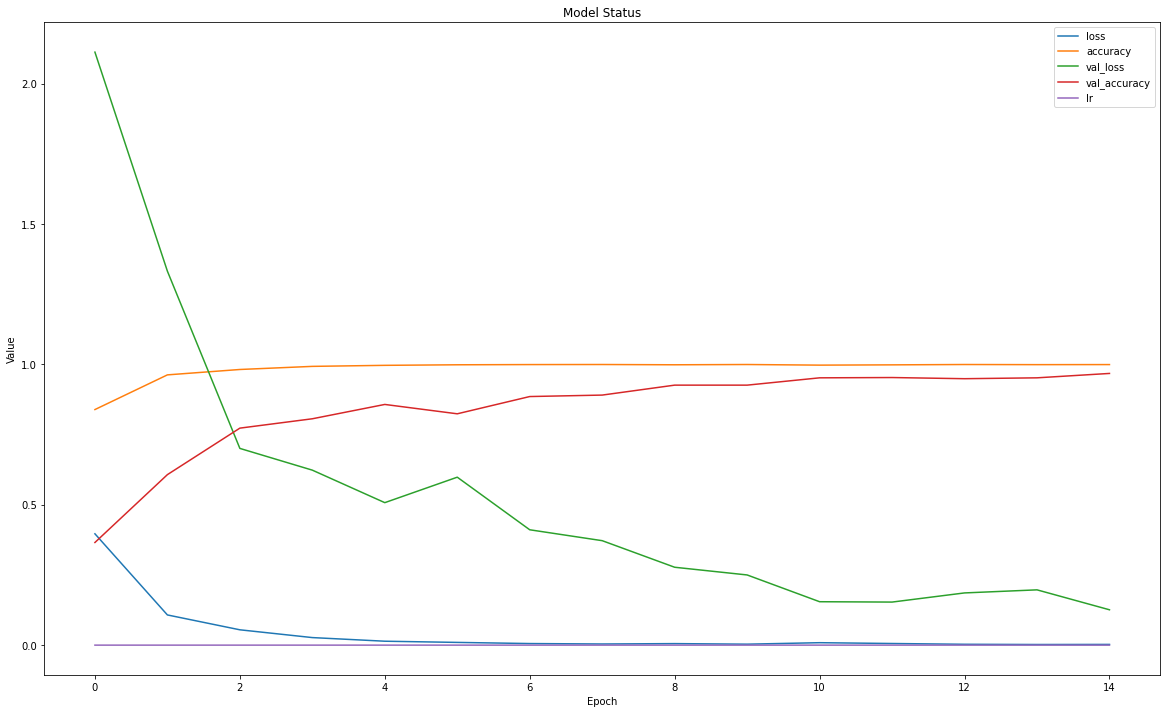

In [123]:
pd.DataFrame(historyMobileNet.history).plot(figsize=(20, 12))
plt.title('Model Status')
plt.ylabel('Value')
plt.xlabel('Epoch');

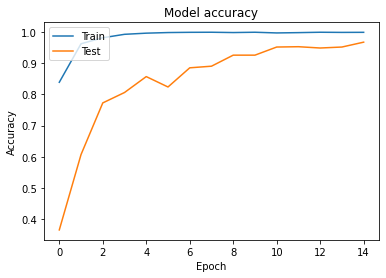

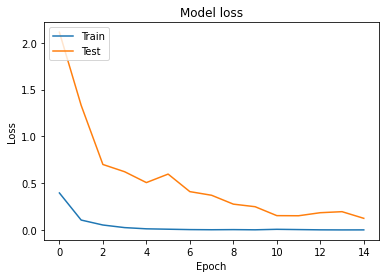

In [124]:
plt.plot(historyMobileNet.history['accuracy'])
plt.plot(historyMobileNet.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(historyMobileNet.history['loss'])
plt.plot(historyMobileNet.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<a id='perf'></a>
## Model Performance

In [127]:
test_accu = model_MobileNet.evaluate(testRgb)
print('The testing accuracy is :',test_accu[1]*100, '%')

395/395 [==============================] - 3s 8ms/step - loss: 0.0847 - accuracy: 0.9696
The testing accuracy is : 96.96202278137207 %


In [128]:
from keras.models import load_model
model = load_model('./model_MobileNetT.h5')

In [129]:
idx2label_dict = {testRgb.class_indices[k]: k for k in testRgb.class_indices}
idx2label_dict

{0: 'Glioma', 1: 'Meningioma', 2: 'No_Tumor', 3: 'Pituitary'}

confusion matrix :
 [[ 65   2   0   0]
 [  6 126   0   0]
 [  2   0  62   0]
 [  0   2   0 130]]
Precision Score :  0.9696202531645569
Recall Score :  0.9696202531645569
classification_report :
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        67
           1       0.97      0.95      0.96       132
           2       1.00      0.97      0.98        64
           3       1.00      0.98      0.99       132

    accuracy                           0.97       395
   macro avg       0.96      0.97      0.97       395
weighted avg       0.97      0.97      0.97       395



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


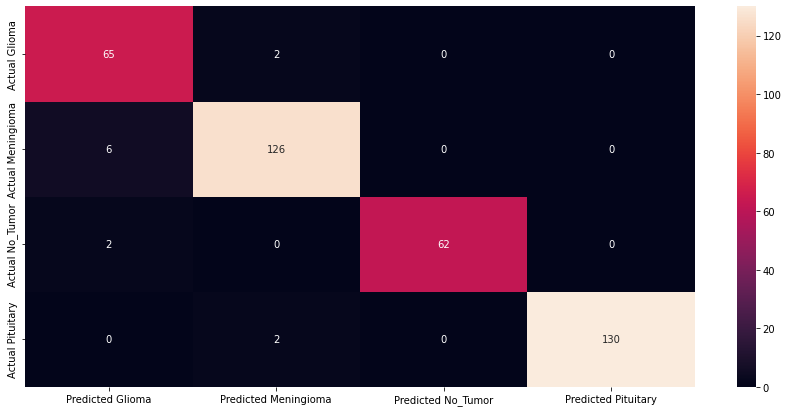

In [131]:
predict_x=model_MobileNet.predict(testRgb) 
y_pred=np.argmax(predict_x,axis=1)
idx2label_dict = {testRgb.class_indices[k]: k for k in testRgb.class_indices}
y_true = testRgb.classes


plt.figure(figsize = (15,7))

cm = pd.DataFrame(data=confusion_matrix(y_true, y_pred, labels=[0, 1,2,3]),
                  
                  index=["Actual " + idx2label_dict[0],
                         "Actual " + idx2label_dict[1],
                         "Actual " + idx2label_dict[2],
                         "Actual " + idx2label_dict[3]],
                  
                  columns=["Predicted "+ idx2label_dict[0],
                           "Predicted "+ idx2label_dict[1],
                           "Predicted "+ idx2label_dict[2],
                           "Predicted "+ idx2label_dict[3]])

seaborn.heatmap(cm,annot=True,fmt="d");

#test_accuracy = model_MobileNet.evaluate(testRgb)
#print('The testing accuracy is :',test_accuracy[1]*100, '%')
print('confusion matrix :\n',confusion_matrix(y_true,y_pred))
print("Precision Score : ",precision_score(y_true, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_true, y_pred, pos_label='positive',average='micro'))
print('classification_report :\n',classification_report(y_true,y_pred))

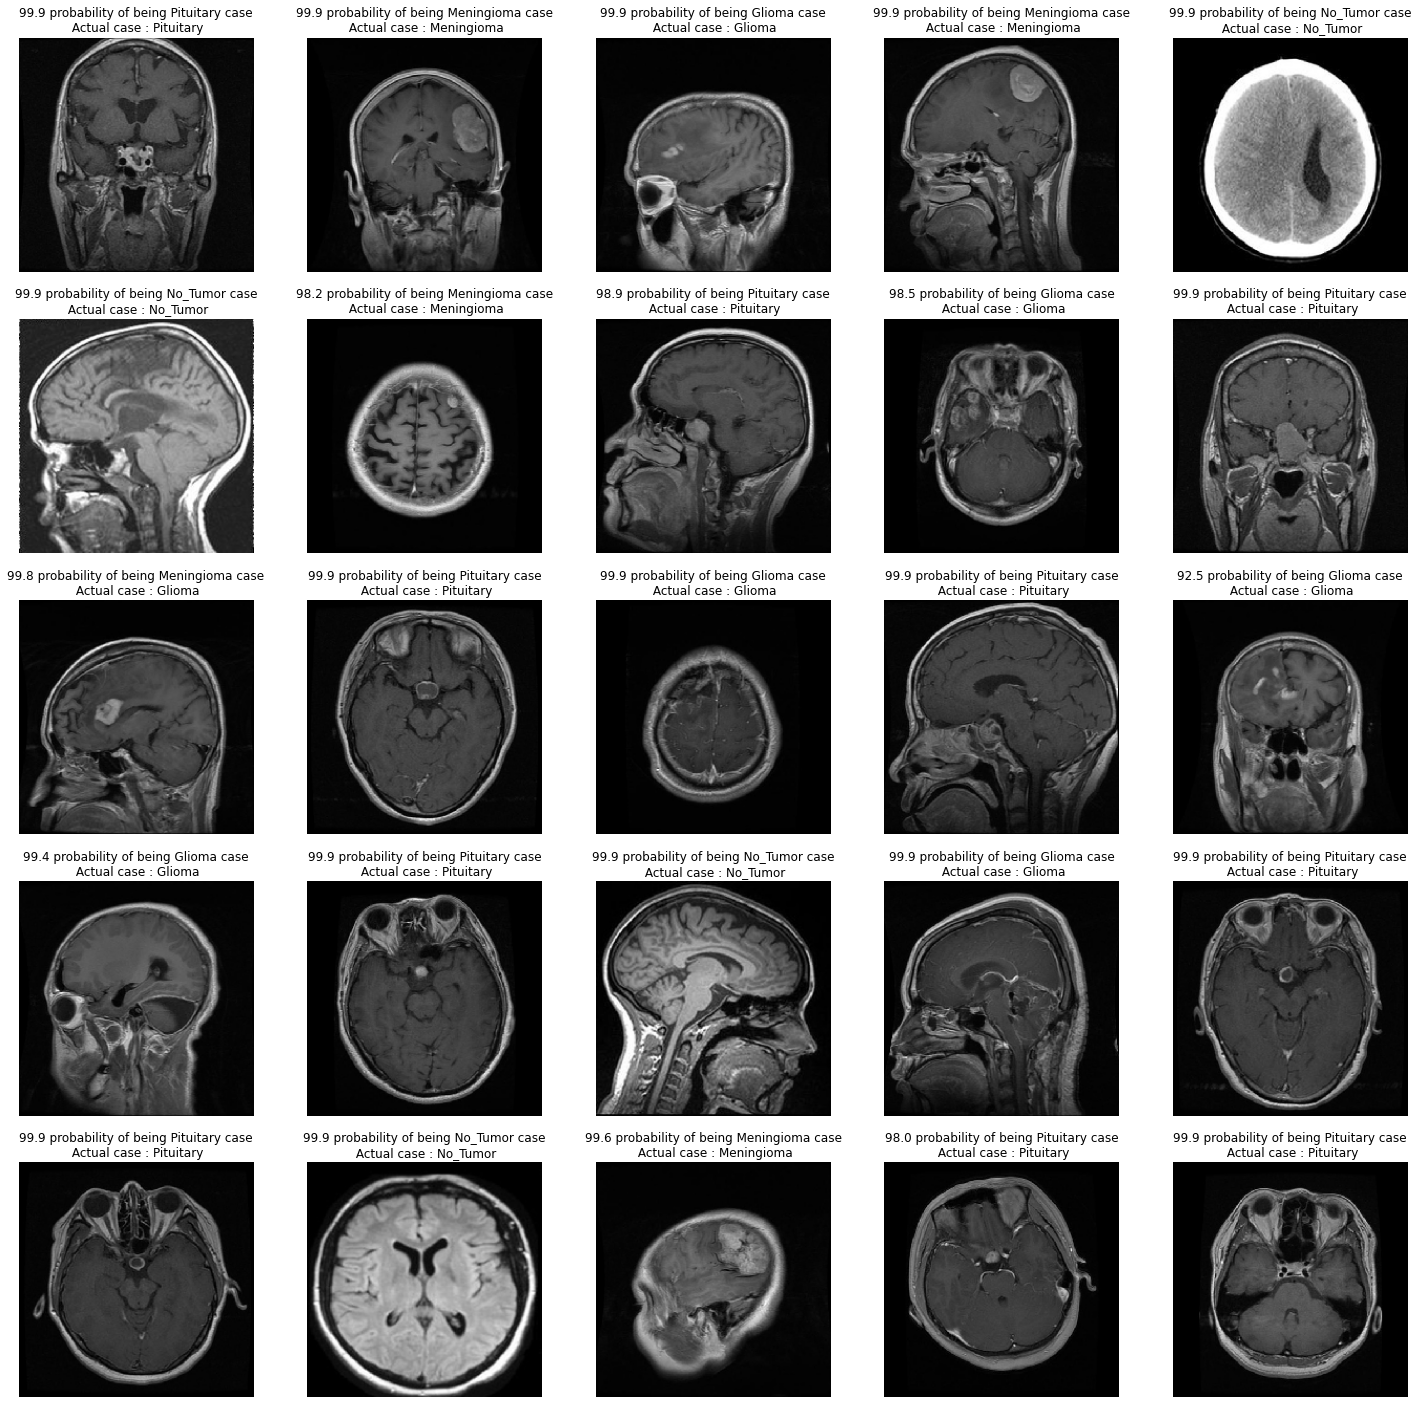

In [133]:
plt.figure(figsize=(25,25))
randomlist = random.sample(range(0, len(testRgb)-1), 25)
index_list = 0
for i in range(0+228, 25+228):
        plt.subplot(5, 5, (i-228)+1)
        #print(predict_x[randomlist[index_list]])
        index = np.argmax(predict_x[randomlist[index_list]],axis=0)
        out = str(predict_x[randomlist[index_list]][index]*100)[:4] + ' probability of being '+idx2label_dict[y_pred[randomlist[index_list]]]+' case'
        #print(y_pred[randomlist[index_list]] ,index , predict_x[randomlist[index_list]][index])
        plt.title(out+"\n Actual case : "+ idx2label_dict.get(y_true[randomlist[index_list]]))    
        plt.imshow(np.squeeze(testRgb[randomlist[index_list]][0]))
        plt.axis('off')
        index_list = index_list + 1
plt.show()

In [137]:
img = cv2.imread('../input/brain-tumor-classification-mri/Testing/glioma_tumor/image(1).jpg')
img = cv2.resize(img,dsize=(224,224),interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
input_arr = tf.keras.preprocessing.image.img_to_array(gray)
input_arr = np.array([input_arr]) 
input_arr = input_arr.astype('float32') / 255.  
predictions = model_MobileNet.predict(input_arr)
print(np.argmax(predictions,axis=1)   ,predictions)
print(np.argmax(predictions,axis=1)   ,predictions[0]*100)
print(np.argmax(predictions,axis=1)   ,predictions[0][1]*100)

[0] [[9.9957281e-01 3.2955009e-04 7.4824857e-05 2.2807431e-05]]
[0] [9.995728e+01 3.295501e-02 7.482486e-03 2.280743e-03]
[0] 0.03295500937383622


<a id='tensor'></a>
## Convert Model Keras To TensorFlow

In [42]:
from tensorflow import keras
from tensorflow import lite
saved_model_dir = './model_VGG16T.h5'
model = keras.models.load_model(saved_model_dir)
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("./model_VGG16T.tflite","wb").write(tflite_model)

2022-06-03 20:56:50.928068: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-06-03 20:56:53.969014: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 20:56:53.969470: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-06-03 20:56:53.969635: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-06-03 20:56:53.970162: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-03 20:56:53.970599: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had ne

60183288

In [139]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="./MobileNetT.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[  1 224 224   3] <class 'numpy.float32'>

1 output(s):
[1 4] <class 'numpy.float32'>
